<a href="https://colab.research.google.com/github/sbdrchauhan/python-ic/blob/main/pandas_tutorials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I am thankful to different sources for the followowing knowledge. 
- Kevin (Data School)
- CodeCademy

In [1]:
# lets import pandas 
import pandas as pd

In [2]:
%matplotlib inline
# makes plot in Ipython inplace

In [3]:
# lets import matplotlib
import matplotlib.pyplot as plt

In [4]:
# to get the dataset from the google drive saved folders (personal gmail drive)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
ted = pd.read_csv('drive/My Drive/Data/ted.csv')
# I have created Data folder inside my google drive and inside Data folder
# there is ted.csv file/dataset 

In [6]:
# we first look at head of dataset  (meaning first five rows from the dataset)
# but if we say head(10) it will show 10 rows
# also we have tail() method which shows last 5 rows of the dataset
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [7]:
# after observing the dataset, I see that each row is each ted talk given by speaker
# and each columns tells about talks, like how many views, comments, who the speaker
# what is the title, etc

# another useful attribute to look at is shape, which tells how many rows and columns
ted.shape

# important: method has parenthesis like head(), while attributes don't like shape

(2550, 17)

In [8]:
# lets look at data types of each column
ted.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [9]:
# we need to check that if any column has the missing values
ted.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [10]:
# so we can see that there are 6 instances of speaker_occupation where data is missing

**Which talk provoke the most online discussion?**

One way of defining the most online discussion talk as having more comments for less views.

In [11]:
# lets make one column to see this
# so one which has less views per comment will be the one having most online discussion
# this will mean there are less views needed for comments
ted['views_per_comment'] = ted.views/ted.comments
ted.views_per_comment.sort_values().head()

744    450.531587
803    651.739808
96     683.134291
694    703.886818
954    735.525682
Name: views_per_comment, dtype: float64

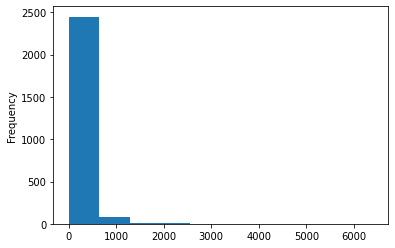

In [12]:
# lets try to see the comments in visually
ted.comments.plot(kind='hist')

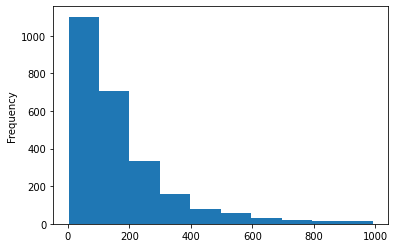

In [13]:
# we can see that most of the comments falls below 1000 so we can scale the graph
# to see that area more
ted[ted.comments<1000].comments.plot(kind='hist')

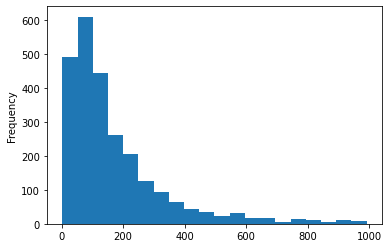

In [14]:
# further if we change the bin number to 20 (default=10)
ted[ted.comments<1000].comments.plot(kind='hist', bins=20)

In [15]:
# so we can see that most of the comments are 100-150 for each talks and few talks 
# has larger comments, above 1000 also but we cut that off.
# On average, each talk gets 100-150 comments

**Plot the number of talks that took place each year**

In [16]:
# For this task we need to look at film_date column. The column time format is in Unix.
# So we need to change the unix to pandas date_time() object, first
# lets make new column
ted['film_datetime'] = pd.to_datetime(ted.film_date, unit='s')

In [17]:
# lets check if we were successful doing above task
ted[['event','film_datetime']].sample(5)

,event,film_datetime
1004,TEDGlobal 2011,2011-07-13
2496,TEDMED 2016,2016-11-30
111,TED2007,2007-03-03
1518,TED2013,2013-02-28
1094,TEDxCanberra,2011-09-24


In [18]:
# from looking above we can see the date on both column matches at least year
# so we can be sure that film_datetime is the column we looking now

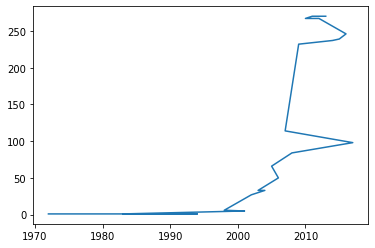

In [19]:
ted.film_datetime.dt.year.value_counts().plot()

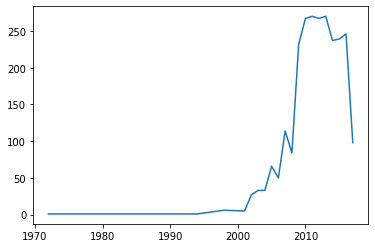

In [20]:
# we have to sort the index before plotting, else our programming language is not
# so smart enough to know this subtlety, because we know that
# while plotting we first look at index (x-axis) and find y axis match
ted.film_datetime.dt.year.value_counts().sort_index().plot()

**What were the "best" events in TED history to attend?**

In [21]:
# lets see the event column with their number of talks
ted.event.value_counts().head()

TED2014    84
TED2009    83
TED2016    77
TED2013    77
TED2015    75
Name: event, dtype: int64

In [22]:
ted.groupby('event').views.agg(['count','mean','sum']).sort_values('sum').tail()
# to use groupby
# for each "event" I want to do some agg function to some column

,count,mean,sum
event,,,
TED2006,45,3.274345e+06,147345533
TED2015,75,2.011017e+06,150826305
TEDGlobal 2013,66,2.584163e+06,170554736
TED2014,84,2.072874e+06,174121423
TED2013,77,2.302700e+06,177307937


In [23]:
# from above table we can see TED2013 has largest views. Must be a good event

**Lets look at the ratings column**

In [24]:
ted.ratings.head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [25]:
# we can see each row has a list of dictionaries

In [26]:
ted.ratings[0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [27]:
# to make the real python list of dictionaries
import ast
ted['ratings_list'] = ted.ratings.apply(lambda x: ast.literal_eval(x))

In [28]:
ted.ratings_list.head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings_list, dtype: object

In [29]:
ted.ratings_list[0]

[{'count': 19645, 'id': 7, 'name': 'Funny'},
 {'count': 4573, 'id': 1, 'name': 'Beautiful'},
 {'count': 6073, 'id': 9, 'name': 'Ingenious'},
 {'count': 3253, 'id': 3, 'name': 'Courageous'},
 {'count': 387, 'id': 11, 'name': 'Longwinded'},
 {'count': 242, 'id': 2, 'name': 'Confusing'},
 {'count': 7346, 'id': 8, 'name': 'Informative'},
 {'count': 10581, 'id': 22, 'name': 'Fascinating'},
 {'count': 300, 'id': 21, 'name': 'Unconvincing'},
 {'count': 10704, 'id': 24, 'name': 'Persuasive'},
 {'count': 4439, 'id': 23, 'name': 'Jaw-dropping'},
 {'count': 1174, 'id': 25, 'name': 'OK'},
 {'count': 209, 'id': 26, 'name': 'Obnoxious'},
 {'count': 24924, 'id': 10, 'name': 'Inspiring'}]

**Count the total number of ratings received by each talk**

In [30]:
# we need to retrieve the count for each talk and add them to find total number of ratings
# lets define such function and apply this to whole column
def get_num_ratings(list_of_dicts):
  num = 0
  for d in list_of_dicts:
    num += d['count']
  return num

In [31]:
# lets check above function with just one row ratings data
get_num_ratings(ted.ratings_list[0])

93850

In [32]:
# that number sees right if we just add plain numbers by looking above cells

In [33]:
# lets make one column that keeps records of counts for each talk
ted['num_ratings'] = ted.ratings_list.apply(get_num_ratings)

In [34]:
# lets see it
ted.num_ratings.head()

0    93850
1     2936
2     2824
3     3728
4    25620
Name: num_ratings, dtype: int64

**All DataFrame**

In [35]:
# we need to work on the following dataframe so lets collect them here
orders = pd.read_table('http://bit.ly/chiporders')
users = pd.read_table('http://bit.ly/movieusers')
movies = pd.read_csv('http://bit.ly/imdbratings')

**How to read data from the tabular data?**

`pd.read_table()` has the default of tab as the separator

- `skiprows=` skips the rows we don't want to read
- `sep=` how the data are separated. Example: comma, tab, space, pip | etc
- `header=` None means the data don't have the header row
- `names=` given column names while reading the data if data don't have header

In [36]:
# since we don't have the header row in the following data and also the separator
# file is | we do following
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_table('http://bit.ly/movieusers', sep='|', header=None, names=user_cols)
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


**How do I select a pandas Series from a DataFrame?**

In [37]:
# pandas dataframe has the columns which in other words are also known as Series
ufo = pd.read_table('http://bit.ly/uforeports', sep=',') # our datafile is csv so we used separateer as the comma.
# since read_table thinks separater as 'tab' by default.
# Instead I can just use read_csv command for the csv files.
ufo = pd.read_csv('http://bit.ly/uforeports')

In [38]:
type(ufo) # to confirm that it is a dataframe

pandas.core.frame.DataFrame

In [39]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [40]:
# First method: using a bracket notation
ufo['City']

0                      Ithaca
1                 Willingboro
2                     Holyoke
3                     Abilene
4        New York Worlds Fair
                 ...         
18236              Grant Park
18237             Spirit Lake
18238             Eagle River
18239             Eagle River
18240                    Ybor
Name: City, Length: 18241, dtype: object

In [41]:
type(ufo['City'])

pandas.core.series.Series

In [42]:
# Second method: using dot notation
ufo.City

0                      Ithaca
1                 Willingboro
2                     Holyoke
3                     Abilene
4        New York Worlds Fair
                 ...         
18236              Grant Park
18237             Spirit Lake
18238             Eagle River
18239             Eagle River
18240                    Ybor
Name: City, Length: 18241, dtype: object

In [43]:
# dot notation use advantage of dataframe as it series becomes attributes

In [44]:
# concatenate the two columns and create new column
# if both are strings or numbers
ufo['Location'] = ufo.City + ', ' + ufo.State # we need to always use bracket notation
# to create new column

In [45]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Location
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,"Ithaca, NY"
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,"Willingboro, NJ"
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,"Holyoke, CO"
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,"Abilene, KS"
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,"New York Worlds Fair, NY"


In [46]:
# lets see another dataframe
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [47]:
movies.describe() # this method gives descriptive stats of the numeric column

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [48]:
movies.shape

(979, 6)

In [49]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [50]:
# from above we see that there are only two columns that are numeric
# so our describe() method show only info of those columns

In [51]:
# but describe() method also can describe of object
movies.describe(include=['object'])

,title,content_rating,genre,actors_list
count,979,976,979,979
unique,975,12,16,969
top,The Girl with the Dragon Tattoo,R,Drama,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
freq,2,460,278,6


**How do I rename columns in a DataFrame?**

In [52]:
# lets loook ufo df
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Location
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,"Ithaca, NY"
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,"Willingboro, NJ"
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,"Holyoke, CO"
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,"Abilene, KS"
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,"New York Worlds Fair, NY"


In [53]:
ufo.columns # gives the names of all column header

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time',
       'Location'],
      dtype='object')

In [54]:
# first method: 
ufo.rename(columns={'Colors Reported':'Colors_Reported',
                    'Shape Reported':'Shape_Reported'}, inplace=True)

In [55]:
ufo.head()

,City,Colors_Reported,Shape_Reported,State,Time,Location
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,"Ithaca, NY"
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,"Willingboro, NJ"
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,"Holyoke, CO"
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,"Abilene, KS"
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,"New York Worlds Fair, NY"


In [56]:
# second method:
# lets first call df again
ufo = pd.read_csv('http://bit.ly/uforeports')

In [57]:
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [58]:
ufo_cols = ['city','colors_reported','shape_reported','state','time']
ufo.columns = ufo_cols

In [59]:
# lets see
ufo.columns

Index(['city', 'colors_reported', 'shape_reported', 'state', 'time'], dtype='object')

**How do I remove columns from a DataFrame?**

In [60]:
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [61]:
ufo.shape

(18241, 5)

In [62]:
ufo.drop('Colors Reported', axis=1, inplace=True)
ufo.head()
# axis = 0 means rowwise, axis=1 means columnwise

,City,Shape Reported,State,Time
0,Ithaca,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,OTHER,NJ,6/30/1930 20:00
2,Holyoke,OVAL,CO,2/15/1931 14:00
3,Abilene,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,LIGHT,NY,4/18/1933 19:00


In [63]:
# now if we like to remove rows
ufo.drop([0,2], axis=0, inplace=True)
ufo.head()

,City,Shape Reported,State,Time
1,Willingboro,OTHER,NJ,6/30/1930 20:00
3,Abilene,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,LIGHT,NY,4/18/1933 19:00
5,Valley City,DISK,ND,9/15/1934 15:30
6,Crater Lake,CIRCLE,CA,6/15/1935 0:00


**How do I sort a pandas DataFrame or Series?**

In [64]:
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [65]:
# if we like to sort a single column title in this case
movies['title'].sort_values()
# numbers comes first and alphabets

542     (500) Days of Summer
5               12 Angry Men
201         12 Years a Slave
698                127 Hours
110    2001: A Space Odyssey
               ...          
955         Zero Dark Thirty
677                   Zodiac
615               Zombieland
526                     Zulu
864                    [Rec]
Name: title, Length: 979, dtype: object

In [66]:
# in descending order
movies.title.sort_values(ascending=False)

864                    [Rec]
526                     Zulu
615               Zombieland
677                   Zodiac
955         Zero Dark Thirty
               ...          
110    2001: A Space Odyssey
698                127 Hours
201         12 Years a Slave
5               12 Angry Men
542     (500) Days of Summer
Name: title, Length: 979, dtype: object

In [67]:
# if we like to see whole df sorted according to some columns
movies.sort_values('title')

,star_rating,title,content_rating,genre,duration,actors_list
542,7.8,(500) Days of Summer,PG-13,Comedy,95,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
201,8.1,12 Years a Slave,R,Biography,134,"[u'Chiwetel Ejiofor', u'Michael Kenneth Willia..."
698,7.6,127 Hours,R,Adventure,94,"[u'James Franco', u'Amber Tamblyn', u'Kate Mara']"
110,8.3,2001: A Space Odyssey,G,Mystery,160,"[u'Keir Dullea', u'Gary Lockwood', u'William S..."
...,...,...,...,...,...,...
955,7.4,Zero Dark Thirty,R,Drama,157,"[u'Jessica Chastain', u'Joel Edgerton', u'Chri..."
677,7.7,Zodiac,R,Crime,157,"[u'Jake Gyllenhaal', u'Robert Downey Jr.', u'M..."
615,7.7,Zombieland,R,Comedy,88,"[u'Jesse Eisenberg', u'Emma Stone', u'Woody Ha..."
526,7.8,Zulu,UNRATED,Drama,138,"[u'Stanley Baker', u'Jack Hawkins', u'Ulla Jac..."


In [68]:
# sorting by multiple columns
# the order of sorting matters, in this case
movies.sort_values(['content_rating','duration'])

,star_rating,title,content_rating,genre,duration,actors_list
713,7.6,The Jungle Book,APPROVED,Animation,78,"[u'Phil Harris', u'Sebastian Cabot', u'Louis P..."
513,7.8,Invasion of the Body Snatchers,APPROVED,Horror,80,"[u'Kevin McCarthy', u'Dana Wynter', u'Larry Ga..."
272,8.1,The Killing,APPROVED,Crime,85,"[u'Sterling Hayden', u'Coleen Gray', u'Vince E..."
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
612,7.7,A Hard Day's Night,APPROVED,Comedy,87,"[u'John Lennon', u'Paul McCartney', u'George H..."
...,...,...,...,...,...,...
387,8.0,Midnight Cowboy,X,Drama,113,"[u'Dustin Hoffman', u'Jon Voight', u'Sylvia Mi..."
86,8.4,A Clockwork Orange,X,Crime,136,"[u'Malcolm McDowell', u'Patrick Magee', u'Mich..."
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


**How do I filter rows of a pandas DataFrame by column value?**

In [69]:
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [70]:
movies.shape

(979, 6)

In [71]:
# lets filter df by movies that has duration of 200 or more
movies[movies.duration >= 200]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [72]:
# since output of one operation of df is most of the time a df itself
# or a series. So, we can further work on one output
movies[movies.duration >= 200].genre
# this should give me movies that are at least 200 long
# and their genre

2          Crime
7      Adventure
17         Drama
78         Crime
85     Adventure
142    Adventure
157        Drama
204    Adventure
445    Adventure
476        Drama
630    Biography
767       Action
Name: genre, dtype: object

**How do I apply multiple filter criteria to a pandas DF?**

In [73]:
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [74]:
# what if we want to filter 200 or more duration with genre Crime
movies[(movies.duration >= 200) & (movies.genre=='Crime')]
# we need to close each condition with parenthesis () with & | operator in between

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."


In [75]:
# for a particular Series there might be multiple conditions
movies[movies.genre.isin(['Crime', 'Drama', 'Action'])]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
970,7.4,Wonder Boys,R,Drama,107,"[u'Michael Douglas', u'Tobey Maguire', u'Franc..."
972,7.4,Blue Valentine,NC-17,Drama,112,"[u'Ryan Gosling', u'Michelle Williams', u'John..."
973,7.4,The Cider House Rules,PG-13,Drama,126,"[u'Tobey Maguire', u'Charlize Theron', u'Micha..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."


**How do I drop every non-numeric columns from the dataframe?**

In [76]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [77]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [78]:
# we will use numpy
import numpy as np
drinks.select_dtypes(include=[np.number])

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0,0,0,0.0
1,89,132,54,4.9
2,25,0,14,0.7
3,245,138,312,12.4
4,217,57,45,5.9
...,...,...,...,...
188,333,100,3,7.7
189,111,2,1,2.0
190,6,0,0,0.1
191,32,19,4,2.5


In [79]:
# if we want to find mean of all column
drinks.mean(axis=0)

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

**How do I use string methods in pandas?**

In [80]:
orders = pd.read_table('http://bit.ly/chiporders')
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [81]:
# if we want to make all items in item_name if uppercase
orders.item_name.str.upper()

0                CHIPS AND FRESH TOMATO SALSA
1                                        IZZE
2                            NANTUCKET NECTAR
3       CHIPS AND TOMATILLO-GREEN CHILI SALSA
4                                CHICKEN BOWL
                        ...                  
4617                            STEAK BURRITO
4618                            STEAK BURRITO
4619                       CHICKEN SALAD BOWL
4620                       CHICKEN SALAD BOWL
4621                       CHICKEN SALAD BOWL
Name: item_name, Length: 4622, dtype: object

In [82]:
# if we like to check if the Series has something we want to find
orders.item_name.str.contains('Chicken')
# it should give series of booleans 

0       False
1       False
2       False
3       False
4        True
        ...  
4617    False
4618    False
4619     True
4620     True
4621     True
Name: item_name, Length: 4622, dtype: bool

In [83]:
# if we mask our df using above boolean, we get all df that has 'Chicken' item in item_name
orders[orders.item_name.str.contains('Chicken')]

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
11,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75
12,6,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$8.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
...,...,...,...,...,...
4604,1828,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",$8.75
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [84]:
# we can even use series of string method one after another
# lets say we want to remove both [ and ] from choice_description column
orders.choice_description.str.replace('[','').str.replace(']','').str.upper()

0                                                     NaN
1                                              CLEMENTINE
2                                                   APPLE
3                                                     NaN
4       TOMATILLO-RED CHILI SALSA (HOT), BLACK BEANS, ...
                              ...                        
4617    FRESH TOMATO SALSA, RICE, BLACK BEANS, SOUR CR...
4618    FRESH TOMATO SALSA, RICE, SOUR CREAM, CHEESE, ...
4619    FRESH TOMATO SALSA, FAJITA VEGETABLES, PINTO B...
4620       FRESH TOMATO SALSA, FAJITA VEGETABLES, LETTUCE
4621    FRESH TOMATO SALSA, FAJITA VEGETABLES, PINTO B...
Name: choice_description, Length: 4622, dtype: object

In [85]:
# we can even use regex
orders.choice_description.str.replace('[\[\]]','')
# brackets used to define the character class

0                                                     NaN
1                                              Clementine
2                                                   Apple
3                                                     NaN
4       Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
                              ...                        
4617    Fresh Tomato Salsa, Rice, Black Beans, Sour Cr...
4618    Fresh Tomato Salsa, Rice, Sour Cream, Cheese, ...
4619    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
4620       Fresh Tomato Salsa, Fajita Vegetables, Lettuce
4621    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
Name: choice_description, Length: 4622, dtype: object

**How do I change the data type of the pandas Series?**

In [86]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [87]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [88]:
# lets say we wan to change the beer_servings columns from int64 to float64
drinks['beer_servings'] = drinks.beer_servings.astype(float)

In [89]:
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [90]:
orders = pd.read_table('http://bit.ly/chiporders')
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [91]:
# lets remove $ sign from item_price and change it to float and find mean
orders.item_price.str.replace('$','').astype(float).mean()

7.464335785374397

**When should I use groupby?**

In [92]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0,0,0.0,Asia
1,Albania,89.0,132,54,4.9,Europe
2,Algeria,25.0,0,14,0.7,Africa
3,Andorra,245.0,138,312,12.4,Europe
4,Angola,217.0,57,45,5.9,Africa


In [93]:
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [94]:
drinks['beer_servings'] = drinks.beer_servings.astype(int)

In [95]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [96]:
# to find average beer_servings across all countries
drinks.beer_servings.mean(axis=0)

106.16062176165804

In [97]:
# BUT, if we want to know how beer_servings varies by continent, groupby comes into play
# anytime we need answer like: for each sth. what is the agg function on another column
# For each continent what is the average beer_servings?
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [98]:
# we could do multiple agg function using groupby
drinks.groupby('continent').beer_servings.agg(['count','min','max','mean'])

,count,min,max,mean
continent,,,,
Africa,53,0,376,61.471698
Asia,44,0,247,37.045455
Europe,45,0,361,193.777778
North America,23,1,285,145.434783
Oceania,16,0,306,89.687500
South America,12,93,333,175.083333


In [99]:
# actually, we don't even need to specify any column after groupby
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [100]:
%matplotlib inline

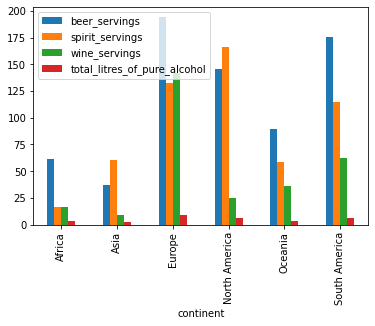

In [101]:
drinks.groupby('continent').mean().plot(kind='bar')

**How do I explore a pandas Series?**

In [102]:
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [103]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [104]:
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [105]:
# count how many times each values occurs
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [106]:
# normalized values are more appropriate
movies.genre.value_counts(normalize=True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Thriller     0.005107
Sci-Fi       0.005107
Film-Noir    0.003064
Family       0.002043
Fantasy      0.001021
History      0.001021
Name: genre, dtype: float64

In [107]:
# to see unique values
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [108]:
# same thing to numeric column
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

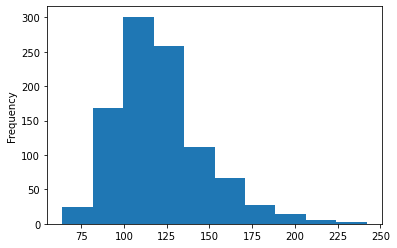

In [109]:
# plot a column
movies.duration.plot(kind='hist')

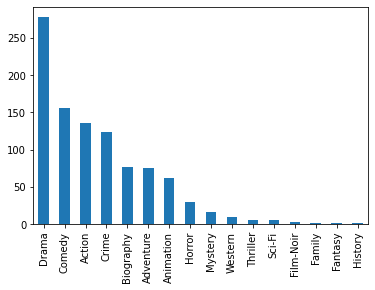

In [110]:
movies.genre.value_counts().plot(kind='bar')

**How do I handle missing values in pandas?**

In [111]:
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.tail()

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


In [112]:
# bunch of NaN are missing values places
ufo.isna().tail()
# this tells me True/False df

,City,Colors Reported,Shape Reported,State,Time
18236,False,True,False,False,False
18237,False,True,False,False,False
18238,False,True,True,False,False
18239,False,False,False,False,False
18240,False,True,False,False,False


In [113]:
# if we want to count how many nulls are there in each column
ufo.isna().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [114]:
ufo.shape

(18241, 5)

In [115]:
# lets mask the df where City has nulls
ufo[ufo.City.isna()]

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00
1877,NaN,YELLOW,CIRCLE,AZ,8/15/1969 1:00
2013,NaN,NaN,NaN,NH,8/1/1970 9:30
2546,NaN,NaN,FIREBALL,OH,10/25/1973 23:30
3123,NaN,RED,TRIANGLE,WV,11/25/1975 23:00
4736,NaN,NaN,SPHERE,CA,6/23/1982 23:00


In [116]:
ufo.shape

(18241, 5)

In [117]:
# How should we deal with those missing values?
# One way is to drop those rows that contains NaNs
# dropna() with how='any' drops any rows if any value in that row is missing
ufo.dropna(how='any').shape

(2486, 5)

In [118]:
# sometimes we don't want to drop like that
# only if certian columns has missing values
ufo.dropna(subset=['City','Shape Reported'], how='any').shape

(15576, 5)

In [119]:
# Other times; we don't want to remove rows 
# instead we want to fill with sth
ufo['Shape Reported'].fillna(value='Various', inplace=True)

In [120]:
ufo['Shape Reported'].value_counts(dropna=False)
# this time we should also see Various counts instead of NaNs

LIGHT        2803
Various      2644
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
ROUND           2
CRESCENT        2
FLARE           1
PYRAMID         1
HEXAGON         1
DOME            1
Name: Shape Reported, dtype: int64

**Selecting in DataFrame using loc**

In [121]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [122]:
# lets say I want to select row 3 and column beer_serving
drinks.loc[3,'beer_servings']
# this works as loc[row_pos, col_pos]

245

In [123]:
# if we change our index it becomes easier to locate values
drinks.set_index('country', inplace=True)
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [124]:
# now selecting becomes more sensible
drinks.loc['Andorra','beer_servings']

245

In [125]:
# now lets reset the index as earlier
drinks.reset_index(inplace=True)

In [126]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [127]:
# lets do some math using mapping function
people = pd.Series([30000, 5000],index=['Albania','Andorra'],name='population')
people

Albania    30000
Andorra     5000
Name: population, dtype: int64

In [128]:
# first set index with country again
drinks.set_index('country',inplace=True)
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [129]:
# I can just use people series and multiply with df' series
drinks.beer_servings * people
# It automatically finds the matching index

Afghanistan          NaN
Albania        2670000.0
Algeria              NaN
Andorra        1225000.0
Angola               NaN
                 ...    
Venezuela            NaN
Vietnam              NaN
Yemen                NaN
Zambia               NaN
Zimbabwe             NaN
Length: 193, dtype: float64

In [130]:
# we can concat Series in vertical column
pd.concat([drinks,people],axis=1).head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,population
Afghanistan,0,0,0,0.0,Asia,NaN
Albania,89,132,54,4.9,Europe,30000.0
Algeria,25,0,14,0.7,Africa,NaN
Andorra,245,138,312,12.4,Europe,5000.0
Angola,217,57,45,5.9,Africa,NaN


**How do I select multiple rows and columns from a pandas DataFrame?**

In [131]:
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [132]:
ufo.loc[0,:]
# zeroth row, all columns

City                       Ithaca
Colors Reported               NaN
Shape Reported           TRIANGLE
State                          NY
Time               6/1/1930 22:00
Name: 0, dtype: object

In [133]:
ufo.loc[[0,2,3],:]
# 0, 2,3 rows and all columns

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00


In [134]:
ufo.loc[0:2,:]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [135]:
# column selection
ufo.loc[:,'City']

0                      Ithaca
1                 Willingboro
2                     Holyoke
3                     Abilene
4        New York Worlds Fair
                 ...         
18236              Grant Park
18237             Spirit Lake
18238             Eagle River
18239             Eagle River
18240                    Ybor
Name: City, Length: 18241, dtype: object

In [136]:
ufo.loc[:,['City','State']]

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
...,...,...
18236,Grant Park,IL
18237,Spirit Lake,IA
18238,Eagle River,WI
18239,Eagle River,WI


In [137]:
ufo.loc[:,'City':'State']

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY
...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL
18237,Spirit Lake,NaN,DISK,IA
18238,Eagle River,NaN,NaN,WI
18239,Eagle River,RED,LIGHT,WI


In [138]:
ufo.loc[0:2,'City':'State']

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO


In [139]:
# we can even use mask using loc
ufo.loc[ufo.City=='Oakland',:]

,City,Colors Reported,Shape Reported,State,Time
1694,Oakland,NaN,CIGAR,CA,7/21/1968 14:00
2144,Oakland,NaN,DISK,CA,8/19/1971 0:00
4686,Oakland,NaN,LIGHT,MD,6/1/1982 0:00
7293,Oakland,NaN,LIGHT,CA,3/28/1994 17:00
8488,Oakland,NaN,NaN,CA,8/10/1995 21:45
8768,Oakland,NaN,NaN,CA,10/10/1995 22:40
10816,Oakland,NaN,LIGHT,OR,10/1/1997 21:30
10948,Oakland,NaN,DISK,CA,11/14/1997 19:55
11045,Oakland,NaN,TRIANGLE,CA,12/10/1997 1:30
12322,Oakland,NaN,FIREBALL,CA,10/9/1998 19:40


In [140]:
ufo.loc[ufo.City=='Oakland','State']

1694     CA
2144     CA
4686     MD
7293     CA
8488     CA
8768     CA
10816    OR
10948    CA
11045    CA
12322    CA
12941    CA
16803    MD
17322    CA
Name: State, dtype: object

**How to use pandas for Kaggle submission?**

In [141]:
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()
# titanic training datset from kaggle

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [142]:
# lets make our feature columns
feature_cols = ['Pclass', 'Parch']

In [143]:
X = train.loc[:,feature_cols]

In [144]:
X.shape

(891, 2)

In [145]:
y = train.Survived

In [146]:
y.shape

(891,)

In [147]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X,y)
# refer to scikit learn tutorial to understand these lines

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [148]:
test = pd.read_csv('http://bit.ly/kaggletest')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [149]:
X_new = test.loc[:,feature_cols]
X_new.shape

(418, 2)

In [150]:
new_pred_class = logreg.predict(X_new)

In [151]:
test.PassengerId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [152]:
new_pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [153]:
pd.DataFrame({'PassengerId':test.PassengerId,
              'Survived':new_pred_class}).set_index('PassengerId').to_csv('sub.csv')

In [154]:
# bonus:
# how do you save the dataframe object from the python to save to flash drive
# lets pickle it
# lets save the train data set
train.to_pickle('train.pkl')

In [155]:
pd.read_pickle('train.pkl')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [156]:
# to get the random sample from the large dataset
ufo.sample(n=3, random_state=42)

,City,Colors Reported,Shape Reported,State,Time
217,Norridgewock,NaN,DISK,ME,9/15/1952 14:00
12282,Ipava,NaN,TRIANGLE,IL,10/1/1998 21:15
17933,Ellinwood,NaN,FIREBALL,KS,11/13/2000 22:00


In [157]:
# we can even specify the percentage of samples
train = ufo.sample(frac=0.75,random_state=99)

In [158]:
# making train test split for the ML
test = ufo.loc[ ~ufo.index.isin(train.index),:]
# this will select all the other 25% of rows that is not in the test set

**How do I create dummy variable in pandas?**

In [159]:
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [160]:
# now lets say we want to create the dummy variables for the Sex column
# lets say male 1 and female 0
train['sex_male_female'] = train.Sex.map({'male':1,'female':0})

In [161]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_male_female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [162]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [163]:
embarked_dummies = pd.get_dummies(train.Embarked,prefix='Embarked').iloc[:, 1:]

In [164]:
pd.concat([train, embarked_dummies], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_male_female,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,0


In [165]:
# next way
pd.get_dummies(train.Sex).iloc[:, 1:]

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


**How do I work with dates and times in pandas?**

In [166]:
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [167]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [168]:
# Time column in object
# we can change it to datetime
ufo['Time'] = pd.to_datetime(ufo.Time)

In [169]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [170]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [171]:
# This will unlock several pandas datetime object features
ufo.Time.dt.hour

0        22
1        20
2        14
3        13
4        19
         ..
18236    23
18237    23
18238    23
18239    23
18240    23
Name: Time, Length: 18241, dtype: int64

In [172]:
ts = pd.to_datetime('1/1/1990')
# my timestamp for reference

In [173]:
# We can do masking as well
ufo.loc[ufo.Time > ts,:].head()

,City,Colors Reported,Shape Reported,State,Time
6258,no data,NaN,NaN,NV,1990-01-01 23:00:00
6259,Barkhamsted,NaN,NaN,CT,1990-01-03 20:00:00
6260,New Orleans,NaN,DISK,LA,1990-01-06 22:00:00
6261,Sutton,NaN,VARIOUS,AK,1990-01-07 09:00:00
6262,Americus,NaN,OVAL,IN,1990-01-11 03:30:00


In [174]:
# we can even do math with time series
ufo.Time.max() - ufo.Time.min()

Timedelta('25781 days 01:59:00')

In [175]:
(ufo.Time.max() - ufo.Time.min()).days

25781

In [176]:
ufo['Year'] = ufo.Time.dt.year

In [177]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


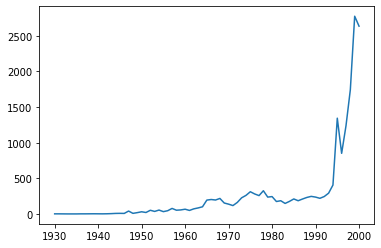

In [178]:
ufo.Year.value_counts().sort_index().plot()

**How do I remove duplicate rows in pandas?**

In [179]:
user_cols = ['user_id','age','gender','occupation','zip_code']
users = pd.read_table('http://bit.ly/movieusers', sep='|', header=None, names=user_cols)

In [180]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [181]:
users.set_index('user_id').head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [182]:
users.shape

(943, 5)

In [183]:
users.zip_code.duplicated().sum()
# counts the number of duplicate values in zip_code column
# since zip code will have same values most of the times

148

**Merging DataFrame in pandas**

In [184]:
# Some of the functions that are frequently used in Merging the dataframes:
# df1.append(df2)  : stacking vertically
# pd.concat([df1,df2]) : stacking horizontally or vertically
# df1.join(df2)  : inner/outer/left/right joins on indexs
# pd.merge([df1,df2]) : many joins on multiple columns


pd.merge() basically all we need to learn.

pd.merge(df1,df2) merges all column with the same name. It went from left and trying to find every instance available in df2 with merging column

pd.merge(df1,df2, left_on = 'specify_col_for left_df', right_on='coln_name_for_right_df')

pd.merge(df1,df2, left_index=True, right_on='col_name') if left df is merged using the index rather than the column

pd.merge(df1,df2, how='inner') matches coln name to join and only joins that your join on is present on both dfs

pd.merge(df1,df2, how='outer') this time includes all the rows from both dfs

pd.merge(df1,df2, how='left') keeps all keys of left df at least

pd.merge(df1,df2, how='right') keeps all keys of right df at least


**How do I apply a function to a pandas Series or DataFrame?**

In [185]:
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [186]:
# map() is a Series method
# In this case, lets say we want to create a dummy variable for the Seris Sex values i.e. 1 for male and 0 for female

In [187]:
train['Sex_num'] = train.Sex.map({'male':1,'female':0})

In [188]:
train.loc[0:4,['Sex','Sex_num']]

,Sex,Sex_num
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


In [189]:
# apply() method applies a function to each element in the Series
train['Name_length'] = train.Name.apply(len)

In [190]:
train.loc[0:4,['Name','Name_length']]

,Name,Name_length
0,"Braund, Mr. Owen Harris",23
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51
2,"Heikkinen, Miss. Laina",22
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",44
4,"Allen, Mr. William Henry",24


In [191]:
# lets use apply() to more complicated task.
# lets say we want to get only the last names from the Name column and create new column for it
# lets create our function that does this job and later we will apply this function to the required Series

In [192]:
def get_last_name(my_list,position):
  return my_list[position]

In [193]:
train.Name.str.split(',').apply(get_last_name,position=0) # we first split the list element

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Name, Length: 891, dtype: object

In [194]:
# using lambda function in such cases is common, because you don't need to make your small function everytime
train.Name.str.split(',').apply(lambda x:x[0]).head()

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Name, dtype: object

In [195]:
# lets say I want to know maximum values in beer_servings through wine_servings coln
drinks.loc[:,'beer_servings':'wine_servings'].apply(max,axis=0)

beer_servings      376
spirit_servings    438
wine_servings      370
dtype: int64

**How do I create a pandas DataFrame from another object?**

In [196]:
# lets first create using Dictionary
# keys become a column names, and values become in order values in df
df = pd.DataFrame({'id':[100,101,102], 'color':['red','blue','red']},columns=['id','color'],index=['a','b','c'])

In [197]:
df

,id,color
a,100,red
b,101,blue
c,102,red


In [198]:
# Second way: list of lists. Each inner list becomes one row and they stack on top of each other
pd.DataFrame([[100,'red'], [101,'blue'], [102,'red']], columns=['id','color'])

,id,color
0,100,red
1,101,blue
2,102,red


In [199]:
# third way: converting numpy array to dataframe
import numpy as np
arr = np.random.rand(4,2) # creates 4 by 2 numpy array of random numbers
arr

array([[0.12804236, 0.41085105],
       [0.30417477, 0.71073328],
       [0.119254  , 0.4767758 ],
       [0.558412  , 0.6907905 ]])

In [200]:
# making larger dataframe
pd.DataFrame({'student':np.arange(100,110,1),'test':np.random.randint(60,101,10)}).set_index('student')

,test
student,
100,88
101,70
102,61
103,77
104,68
105,86
106,73
107,86
108,67


In [201]:
s = pd.Series(['round','square'],index=['c','b'],name='shape')
s

c     round
b    square
Name: shape, dtype: object

In [202]:
pd.concat([df,s],axis=1)

,id,color,shape
a,100,red,NaN
b,101,blue,square
c,102,red,round


In [203]:
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [204]:
train.Name.apply(len).head()

0    23
1    51
2    22
3    44
4    24
Name: Name, dtype: int64

**Multi-index in pandas**

In [205]:
stocks = pd.read_csv('http://bit.ly/smallstocks')

In [206]:
stocks

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT
5,2016-10-04,31.35,18460400,CSCO
6,2016-10-05,57.64,16726400,MSFT
7,2016-10-05,31.59,11808600,CSCO
8,2016-10-05,113.05,21453100,AAPL


In [207]:
# this what we did down is a Series and it is a Multiindex Series
ser = stocks.groupby(['Symbol','Date']).Close.mean()
ser.index

MultiIndex([('AAPL', '2016-10-03'),
            ('AAPL', '2016-10-04'),
            ('AAPL', '2016-10-05'),
            ('CSCO', '2016-10-03'),
            ('CSCO', '2016-10-04'),
            ('CSCO', '2016-10-05'),
            ('MSFT', '2016-10-03'),
            ('MSFT', '2016-10-04'),
            ('MSFT', '2016-10-05')],
           names=['Symbol', 'Date'])

In [208]:
# unstack() changes the multiindex Series into a dataframe
ser.unstack()

Date,2016-10-03,2016-10-04,2016-10-05
Symbol,,,
AAPL,112.52,113.00,113.05
CSCO,31.50,31.35,31.59
MSFT,57.42,57.24,57.64


In [209]:
# the above thing could have been achieved by using pivot_table() dataframe method
stocks.pivot_table(values='Close',index='Symbol',columns='Date')

Date,2016-10-03,2016-10-04,2016-10-05
Symbol,,,
AAPL,112.52,113.00,113.05
CSCO,31.50,31.35,31.59
MSFT,57.42,57.24,57.64


In [210]:
stocks.set_index(['Symbol','Date'],inplace=True)
stocks

,,Close,Volume
Symbol,Date,,
CSCO,2016-10-03,31.50,14070500
AAPL,2016-10-03,112.52,21701800
MSFT,2016-10-03,57.42,19189500
AAPL,2016-10-04,113.00,29736800
MSFT,2016-10-04,57.24,20085900
CSCO,2016-10-04,31.35,18460400
MSFT,2016-10-05,57.64,16726400
CSCO,2016-10-05,31.59,11808600
AAPL,2016-10-05,113.05,21453100


In [211]:
stocks.sort_index(inplace=True)

In [212]:
stocks

Close    Volume
Symbol Date                        
AAPL   2016-10-03  112.52  21701800
       2016-10-04  113.00  29736800
       2016-10-05  113.05  21453100
CSCO   2016-10-03   31.50  14070500
       2016-10-04   31.35  18460400
       2016-10-05   31.59  11808600
MSFT   2016-10-03   57.42  19189500
       2016-10-04   57.24  20085900
       2016-10-05   57.64  16726400

In [213]:
stocks.loc['AAPL']

,Close,Volume
Date,,
2016-10-03,112.52,21701800
2016-10-04,113.00,29736800
2016-10-05,113.05,21453100


In [214]:
stocks.loc[('AAPL','2016-10-03'),:]

Close          112.52
Volume    21701800.00
Name: (AAPL, 2016-10-03), dtype: float64

In [215]:
stocks.loc[(['AAPL','MSFT'],'2016-10-03'),:]

,,Close,Volume
Symbol,Date,,
AAPL,2016-10-03,112.52,21701800
MSFT,2016-10-03,57.42,19189500


In [216]:
stocks.loc[(['AAPL','MSFT','CSCO'],['2016-10-03','2016-10-04']),:]

Close    Volume
Symbol Date                        
AAPL   2016-10-03  112.52  21701800
       2016-10-04  113.00  29736800
MSFT   2016-10-03   57.42  19189500
       2016-10-04   57.24  20085900
CSCO   2016-10-03   31.50  14070500
       2016-10-04   31.35  18460400

In [217]:
# to make example DataFrame to work on:
df = pd.DataFrame({'col one':[100,200],
                   'col two':[300,400]})
df

,col one,col two
0,100,300
1,200,400


In [218]:
# to quickly rename all the column names
df.columns = df.columns.str.replace(' ','_')

In [219]:
df

,col_one,col_two
0,100,300
1,200,400


In [220]:
# to make larger DataFrame
pd.DataFrame(np.random.rand(4,8))

,0,1,2,3,4,5,6,7
0,0.826771,0.059938,0.275163,0.391028,0.247350,0.057853,0.916356,0.229518
1,0.585770,0.128821,0.748252,0.274234,0.675654,0.790273,0.369918,0.441912
2,0.468480,0.550359,0.065624,0.208156,0.393787,0.897133,0.334837,0.836763
3,0.830537,0.750522,0.563817,0.220376,0.655227,0.529117,0.475933,0.540202


In [221]:
pd.DataFrame(np.random.rand(4,8),columns=list('abcdefgh'))

,a,b,c,d,e,f,g,h
0,0.338975,0.194719,0.511150,0.006973,0.786025,0.483602,0.968227,0.365518
1,0.456429,0.025993,0.020160,0.797554,0.493169,0.160118,0.439870,0.919563
2,0.672581,0.166311,0.741697,0.206674,0.806761,0.062177,0.196361,0.343675
3,0.571340,0.420973,0.921111,0.769760,0.926747,0.377103,0.210203,0.962958


<u>**The materials below will be from CodeCademy.**</u>

In [223]:
# the first task is as always load the pandas module.
import pandas as pd

**Create a DataFrame I**

A DataFrame is an object that stores data as rows and columns (like a spreadsheet or as a SQL table). You can manually create a DataFrame or fill it with data from a CSV, and excel sheet, or SQL query.

DataFrames have rows and columns. Each column has a name, which is a string. Each row has an index, which is an integer, normally. DataFrames can contain many different data types: strings, ints, floats, tuples, etc.

You can pass in a Dictionary to `pd.DataFrame()`. Each `key` is a column name and each value is a list of column values. The columns must all be the same length or you will get an error.

In [224]:
# example:
df1 = pd.DataFrame({'name': ['John Smith','Jane Doe', 'Joe Schmo'],
                    'address': ['123 Main St.','456 Maple Avn.', '789 Boradway'],
                    'age': [34, 28, 51]})

In [225]:
# lets examine df1
df1

,name,address,age
0,John Smith,123 Main St.,34
1,Jane Doe,456 Maple Avn.,28
2,Joe Schmo,789 Boradway,51


**Create a DataFrame II**

You can also add data using lists. For example: You can pass list of lists, where each one represent a row of data. Use the keyword argument `columns=` to pass a list of column names.

In [226]:
# lets see how:
df2 = pd.DataFrame([
                    ['John Smith', '123 Main St.', 34],
                    ['Jane Doe', '456 Maple Avn.', 28],
                    ['Joe Schmo', '789 Broadway', 51]
], columns=['name','address', 'age'])

In [227]:
df2

,name,address,age
0,John Smith,123 Main St.,34
1,Jane Doe,456 Maple Avn.,28
2,Joe Schmo,789 Broadway,51


**Loading and Saving CSVs**

Most of the time we don't have to make our own dataset, luckily. One of the common form of available data is in `csv` format. We load csv into dataframe as:
`df = pd.read_csv('filename.csv')` and we can save our data back to csv as:
`df.to_csv('new_csv_name.csv')`. Here, we passed to_csv to df.

**Inspect a DataFrame**

If df is small, we can easily do `print(df)`, but if it is large, we may just want to view first 5 or last five rows or some fixed rows for inspection.

`head()` gives first 5 rows

`tail()` gives last 5 rows

`head(10)` gives first 10 rows 

`df.info()` gives some statistics for each column

**Select columns**

Two ways to select columns:

1. brackete notation `df[column_name]`
2. dot notatin `df.column_name`

Note, when we select a single column, the result we get is a `Series`.

To get **multiple** columns: we use list of lists for bracket notation

`new_df = df[[column_1, column_2, column_3]]`

**Select Rows**

Rows and columns of the dataframes starts with 0,so they are zero-indexed. Using `iloc` if we know the index position of rows we want, we can do easily.

`df.iloc[rows, columns]`

`df.iloc[3:7,:]`

`df.iloc[:4, :]` or equvalently we can omit column : if we want all

`df.iloc[-3:]`

**Selecting rows with logic I**

You could also select a subset of DataFrame by using logical statements.

`df[df.col_name == some_values]]` we can think of inner part of that expression as being a mask to filter outer df to only see that part from bigger df.

To make logical statements we oftern end up using following comparator operators: `>, <, >=, <=, !=, ==`

**Selecting rows with logic II**

You could also combine the multiple logical statements, as long as each statements is in parenthesis () and that order of parnthesis also matters, so be careful which logical statements you want to filter your data first and so on.

For this task, we often combine: `and &, or |` operations.

Example: `df[(df.col_1 < 30) | (df.col_2 == 'Merry')]`

**Selecting rows with Logic III**

We could use `isin()` command to make multiple checking conditions within a single condition above.

example: `df[(df.col_1 < 30) | (df.col_2.isin(['Merry', 'Sam', 'John']))]`


`reset_index()` helps to make the rows indices arrange from 0 again, since after selecting rows we mess up rows indices.

`reset_index()` returns the new df, but we generally wants to modify the existing ones, so we use `inplac=True` arguments inside of it

**Adding a column I**

One easy way to add new column is by giving a list of same length as existing df. 
`df[new_col] = [data1, data2, ...]` same lenght as others

**Adding a column II**

If we know all of the values in that column are same.
`df[new_col] = True` will create new_col in df that has True value all.

**Adding a column III**

We can add a new column by performing a function on the existing columns.
`df[new_col] = df.old_col * 0.05`

We can use `apply()` function to every value in a particular column.

`df[new_col] = df.old_col.apply(some_function)` some function could be `len` to find the length of string, for instance. Lambda function comes handy when we use `apply()` to put function inside of it as argument.

Lambda function can have multiple parameters, but only on expression. It is used for single task.

Exmaple: 

```python
def myfunction(x):
  if x > 40:
    return 40 + (x-40)*1.50
  else:
    return x

myfunction = lambda x: 40 + (x-40)*1.5 if x > 40 else x
```

**Applying lambda to column of df**

`df[new_col] = df.old_col.apply( lambda x: x.split('@')[-1])` 

to get text after @ from email

`df['price with Tax'] = df.apply(lambda row: row['Price'] * 1.075
if row['Is taxed?'] == 'Yes'
else row['Price'], axis=1)`

`row[col_name]` to access particular values of the row with col_name

**Renaming columns**

1. `df.columns = ['col1', 'col2', ...]`

2. `df.rename(columns={'old':'new'}, inplace=True)`


<u>**Aggregates in pandas**</u>

We can combine all of the values from a column for a single calculation.

* To find median age from a column age
`df.age.median()`
* To know the unique number in a column that has repititious values
`df.col_name.nunique()`
* To get just the unique quantities and not numbers of its counts
`df.col_name.unique()`

General syntax: `df.col_name.command()`

Some of the commands:
`mean(), min(), max(), std(), count()`

**Calculating Aggregate Functions I**

`df.groupby('col_1').col_2.agg_function()`

`df.goupby('student').grad.mean()`

**Pivot tables:**

Reorganizing a table in a different format so that it becomes easier to analyze is what pivot table does.

`df.pivot(columns='ColsToPivot',
          index= 'ColsToBeRows',
          values= 'ColsToBeValues')`

reset_index() to make rows index better.

**merge**

`left, right, how=inner, outer`

**concat**

`pd.concat([df1, df2,...])`

**map**

`df[col_name].map({'male':0
                    'female':1})`

**fillna**

Fills values in missing places

`df[col_name].fillna(inplace=True, value= df[col_name].mean())`

**dropna**

To get rid of NaN from a column

`df = df.dropna(col_name)`
